# Analyzing gradients <font color='brown'>"Gradients"</font> in a simple linear regression
# using [TensorFlow](https://www.tensorflow.org/) <font color=magenta> Eager execution </font>

![Image TensorFlow](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/220px-TensorFlowLogo.svg.png)

### Adapted from: 


*   https://www.tensorflow.org/tutorials/eager/automatic_differentiation
*   https://www.tensorflow.org/guide/eager#computing_gradients



<font size=4 color='green'>[MSTC & MUIT](http://mstc.ssr.upm.es/big-data-track) Introduction to Deep Learning using Tensorflow & Keras</font>

### Import TF and enable <font size=3  color=magenta>eager execution</font>

---



In [0]:
import tensorflow as tf
tf.enable_eager_execution()

tfe = tf.contrib.eager # Shorthand for some symbols

## Derivatives of a function

TensorFlow provides APIs for **<font color=red>automatic differentiation</font>**- computing the derivative of a function. The way that more closely mimics the math is to encapsulate the computation in a Python function, say `f`, and use `tfe.gradients_function` to create a function that computes the derivatives of `f` with respect to its arguments. If you're familiar with [autograd](https://github.com/HIPS/autograd) for differentiating numpy functions, this will be familiar. For example: 

In [0]:
def f(x):
  return tf.square(x)

grad_f = tfe.gradients_function(f)

In [0]:
grad_f([-0.1, 1, 3])

[<tf.Tensor: id=9, shape=(3,), dtype=float32, numpy=array([-0.2,  2. ,  6. ], dtype=float32)>]



---


#<font size=3 color=6600BB>Computing Gradients</font>
https://www.tensorflow.org/guide/eager#computing_gradients

**<font color=red>Automatic differentiation</font>** is useful for implementing machine learning algorithms such as backpropagation for training neural networks. During eager execution, use `tf.GradientTape` to trace operations for computing gradients later.


In [0]:
w = tf.Variable([1.0])
with tf.GradientTape() as tape:
  loss = w * w

grad = tape.gradient(loss, w)
print(grad)  # => tf.Tensor([[ 2.]], shape=(1, 1), dtype=float32)




tf.Tensor([2.], shape=(1,), dtype=float32)




---


### Here's an example of `tf.GradientTape` that records forward-pass operations to train a simple model:

---



In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

In [0]:
# A toy dataset of y = 3 * x + 2
NUM_EXAMPLES = 1000
training_inputs = tf.random_normal([NUM_EXAMPLES])
noise = tf.random_normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise



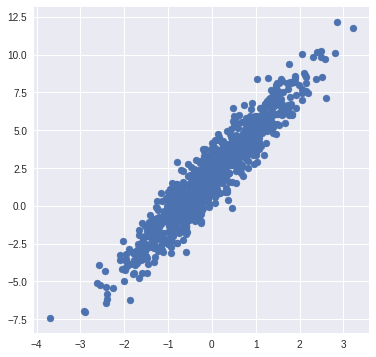

In [0]:
plt.figure(figsize=(6,6))
plt.scatter(training_inputs,training_outputs)

### ... obtain Regression Line as in R seminar 

In [0]:
# TO DO...
# training_outputs = training_inputs * 3 + 2 +

### ... define a prediction function using simple linear regression

In [0]:
def prediction(input, weight, bias):
  return input * weight + bias

### ... define a loss function using mean-squared error for a given (input) value of weights and biases



In [0]:
# A loss function using mean-squared error
def loss(weights, biases):
  error = prediction(training_inputs, weights, biases) - training_outputs
  return tf.reduce_mean(tf.square(error))

## <font color=orange> Use this loss function to plot loss for a range of weights and biases

In [0]:
Z_loss = [[loss(i,j) for i in tf.range(2, 4, 0.01)] for j in tf.range(1, 3, 0.01)]

In [0]:
import numpy as np

w_range = tf.range(2, 4, 0.01)
b_range = tf.range(1, 3, 0.01)

X, Y = np.meshgrid(w_range, b_range)


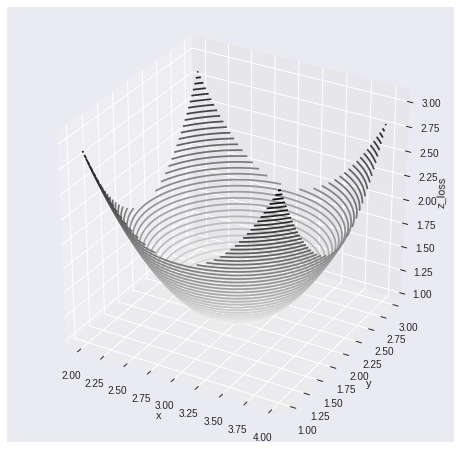

In [0]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_loss, 50, cmap='binary')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z_loss');


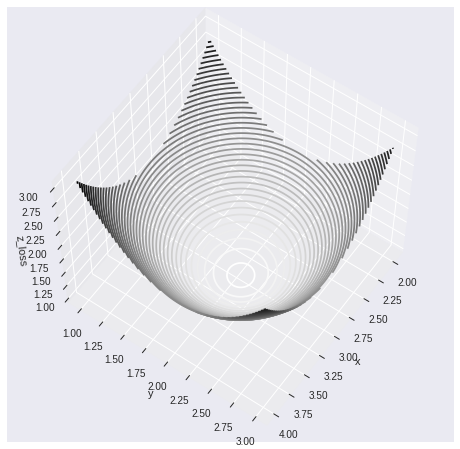

In [0]:
ax.view_init(60, 35)
fig

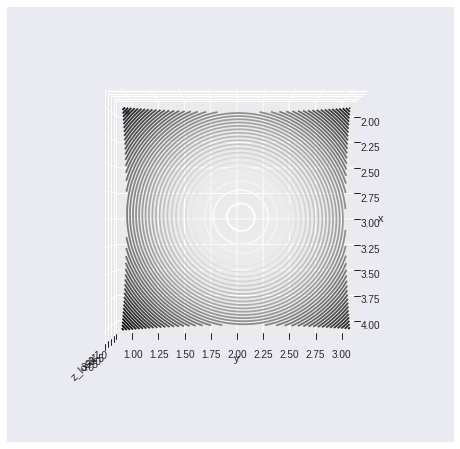

In [0]:
ax.view_init(90, 0)
ax.scatter3D(2.0, 1.0, 2, cmap='Greens');
fig

### ... Return the derivative of loss with respect to weight and bias

In [0]:
# Return the derivative of loss with respect to weight and bias
def grad(weights, biases):
  with tf.GradientTape() as tape:
    loss_value = loss(weights, biases)
  return tape.gradient(loss_value, [weights, biases])


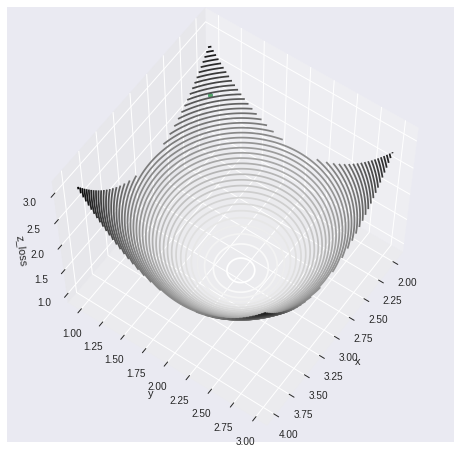

In [0]:
# Start with arbitrary values for W and B on the same batch of data
W = tf.Variable(2.)
B = tf.Variable(1.)

ax.view_init(60, 35)
ax.scatter3D(W.numpy(), B.numpy(), 2, cmap='Greens');
fig


In [0]:
train_steps = 20
learning_rate = 0.01

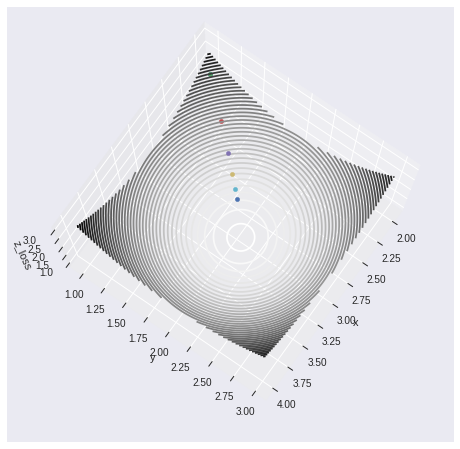

In [0]:
IniLoss=loss(W, B)
for i in range(train_steps):
  dW, dB = grad(W, B)
  W.assign_sub(dW * learning_rate)
  B.assign_sub(dB * learning_rate)
ax.view_init(80, 35)
ax.scatter3D(W.numpy(), B.numpy(), 2, cmap='Greens');
fig


In [0]:
print("Initial loss: {:.3f}".format(IniLoss))
print("Final loss: {:.3f}".format(loss(W, B)))
print("W = {}, B = {}".format(W.numpy(), B.numpy()))

Initial loss: 1.071
Final loss: 1.023
W = 2.835663080215454, B = 1.89279043674469


In [0]:
train_steps = 200
learning_rate = 0.01
# Start with arbitrary values for W and B on the same batch of data
W = tf.Variable(5.)
B = tf.Variable(10.)

print("Initial loss: {:.3f}".format(loss(W, B)))

for i in range(train_steps):
  dW, dB = grad(W, B)
  W.assign_sub(dW * learning_rate)
  B.assign_sub(dB * learning_rate)
  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss(W, B)))

print("Final loss: {:.3f}".format(loss(W, B)))
print("W = {}, B = {}".format(W.numpy(), B.numpy()))


Initial loss: 67.589
Loss at step 000: 64.983
Loss at step 020: 29.801
Loss at step 040: 13.966
Loss at step 060: 6.835
Loss at step 080: 3.622
Loss at step 100: 2.174
Loss at step 120: 1.520
Loss at step 140: 1.226
Loss at step 160: 1.092
Loss at step 180: 1.032
Final loss: 1.006
W = 3.0373358726501465, B = 2.1810402870178223


### ...for more advanced access to gradients see:

`tf.contrib.eager.implicit_gradients(f)`

Returns a function which differentiates f with respect to variables.

https://www.tensorflow.org/api_docs/python/tf/contrib/eager/implicit_gradients

In [0]:
dense_layer = tf.layers.Dense(1)

def loss(x, y):
  return tf.reduce_sum(tf.square(dense_layer(x) - y))

# Obtain the gradient function.
grad_fn = tfe.implicit_gradients(loss)

# Invoke the gradient function with concrete values of x and y.
x = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
y = tf.constant([[10.0], [20.0]])
grads_and_vars = grad_fn(x, y)

# Apply the gradients to Variables.
optimizer = tf.train.GradientDescentOptimizer(0.1)
optimizer.apply_gradients(grads_and_vars)
